# Milestone 3 (Group 17)

Link to repo for this milestone: https://github.com/UBC-MDS/525_group17/blob/main/notebooks/Milestone3.ipynb

### Imports

In [1]:
import numpy as np
import pandas as pd
from joblib import dump, load
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from IPython.display import Image


plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16, 'axes.labelweight': 'bold', 'figure.figsize': (8,6)})

## 1. Setup your EMR cluster (Screenshot 1)

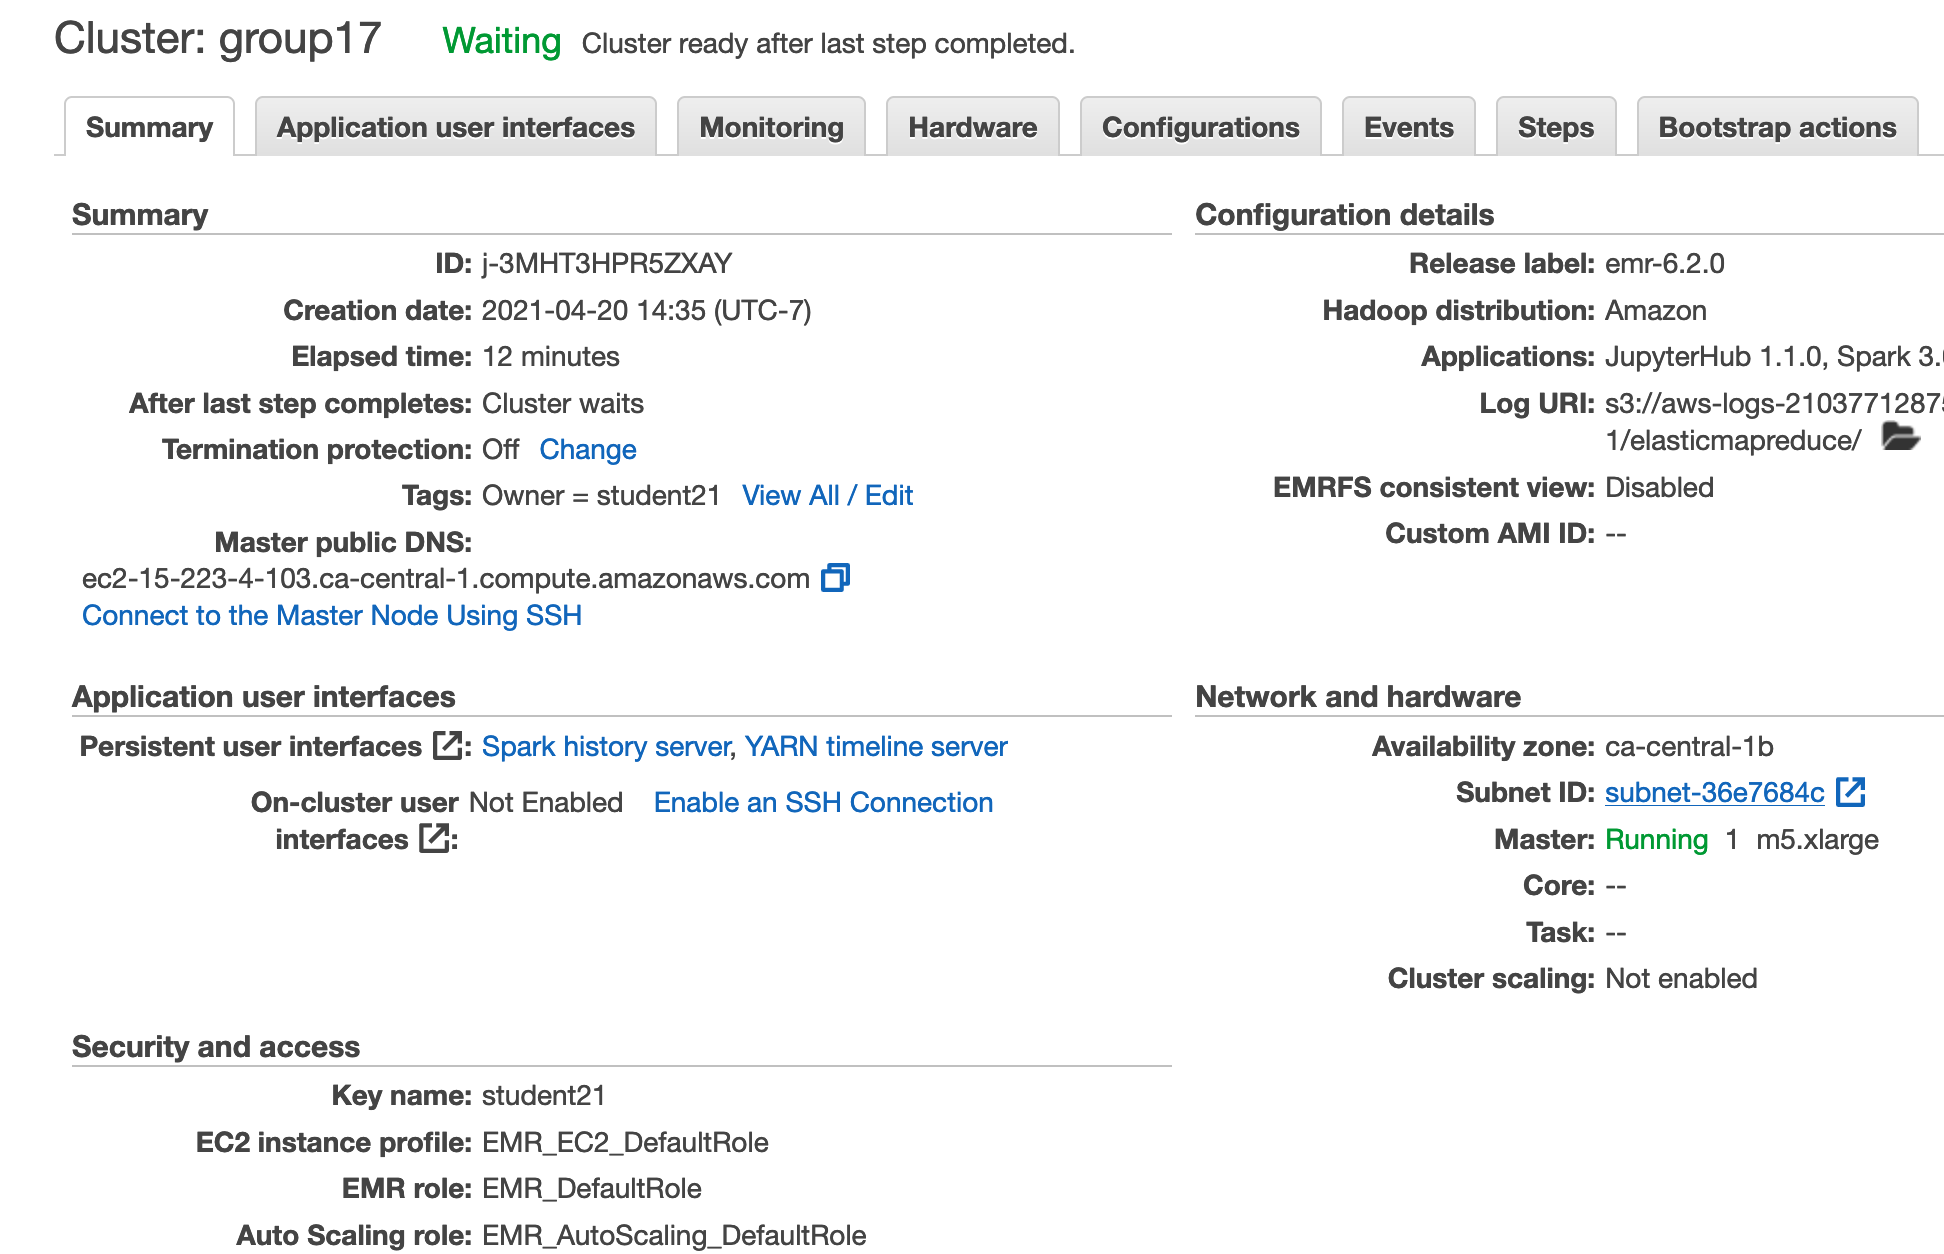

In [2]:
Image(filename='milestone3_screenshot1.png')

## 2. Setup your browser , jupyter environment & connect to the master node.

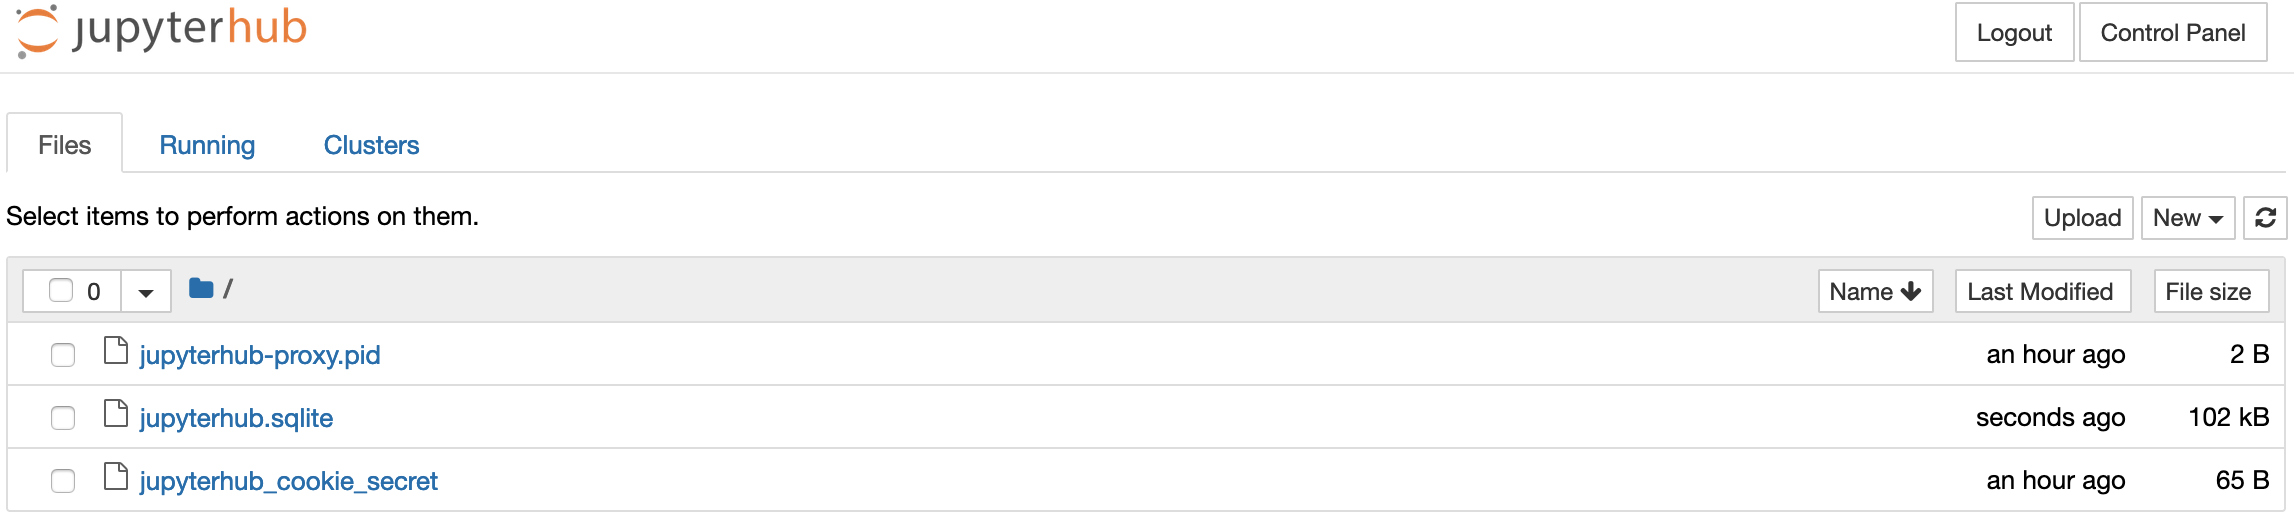

In [3]:
Image(filename='milestone3_screenshot2.png')

## 3. Develop a ML model using scikit-learn.

### Part 1:

Recall as a final goal of this project. We want to build and deploy ensemble machine learning models in the cloud, where features are outputs of different climate models and the target is the actual rainfall observation. In this milestone, you'll actually build these ensemble machine learning models in the cloud.  

**Your tasks:**

1. Read the data CSV from your s3 bucket. 
2. Drop rows with nans. 
3. Split the data into train (80%) and test (20%) portions with `random_state=123`. 
4. Carry out EDA of your choice on the train split. 
5. Train ensemble machine learning model using `RandomForestRegressor` and evaluate with metric of your choice (e.g., `RMSE`) by considering `Observed` as the target column. 
6. Discuss your results. Are you getting better results with ensemble models compared to the individual climate models? 

> Recall that individual columns in the data are predictions of different climate models. 

In [4]:
## You could download it from your bucket, or you can use the file that I have in my bucket. 
## You should be able to access it from my bucket using your key and secret
# aws_credentials ={"key": "","secret": ""} 
# df = pd.read_csv("s3://mds-s3-student96/ml_data_SYD.csv", index_col=0, parse_dates=True)

#### 1. Read the data CSV from our (group 17) s3 bucket.

In [5]:
# aws_credentials ={"key": "",
#                   "secret": ""} 
df = pd.read_csv("s3://mds-s3-student29/output/ml_data_SYD.csv", index_col=0, parse_dates=True)

In [6]:
## Use your ML skills to get from step 1 to step 6
df

,ACCESS-CM2,ACCESS-ESM1-5,AWI-ESM-1-1-LR,BCC-CSM2-MR,BCC-ESM1,CMCC-CM2-HR4,CMCC-CM2-SR5,CMCC-ESM2,CanESM5,EC-Earth3-Veg-LR,...,MPI-ESM-1-2-HAM,MPI-ESM1-2-HR,MPI-ESM1-2-LR,MRI-ESM2-0,NESM3,NorESM2-LM,NorESM2-MM,SAM0-UNICON,TaiESM1,observed
time,,,,,,,,,,,,,,,,,,,,,
1889-01-01,0.040427,1.814552,3.557934e+01,4.268112e+00,1.107466e-03,1.141054e+01,3.322009e-08,2.668800,1.321215,1.515293,...,4.244226e-13,1.390174e-13,6.537884e-05,3.445495e-06,1.576096e+01,4.759651e-05,2.451075,0.221324,2.257933,0.006612
1889-01-02,0.073777,0.303965,4.596520e+00,1.190141e+00,1.015323e-04,4.014984e+00,1.312700e+00,0.946211,2.788724,4.771375,...,4.409552e+00,1.222283e-01,1.049131e-13,4.791993e-09,3.675510e-01,4.350863e-01,0.477231,3.757179,2.287381,0.090422
1889-01-03,0.232656,0.019976,5.927467e+00,1.003845e-09,1.760345e-05,9.660565e+00,9.103720e+00,0.431999,0.003672,4.233980,...,2.269300e-01,3.762301e-01,9.758706e-14,6.912302e-01,1.562869e-01,9.561101e+00,0.023083,0.253357,1.199909,1.401452
1889-01-04,0.911319,13.623777,8.029624e+00,8.225225e-02,1.808932e-01,3.951528e+00,1.317160e+01,0.368693,0.013578,15.252495,...,2.344586e-02,4.214019e-01,7.060915e-03,3.835721e-02,2.472226e-07,5.301038e-01,0.002699,2.185454,2.106737,14.869798
1889-01-05,0.698013,0.021048,2.132686e+00,2.496841e+00,4.708019e-09,2.766362e+00,1.822940e+01,0.339267,0.002468,11.920356,...,4.270161e-13,1.879692e-01,4.504985e+00,3.506923e-07,1.949792e-13,1.460928e-10,0.001026,2.766507,1.763335,0.467628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-27,0.033748,0.123476,1.451179e+00,3.852845e+01,2.061717e-03,8.179260e-09,1.171263e-02,0.090786,59.895053,5.071783,...,4.726998e-13,1.326889e-01,1.827857e+00,6.912632e-03,2.171327e-03,1.620489e+00,2.084252,0.868046,17.444923,0.037472
2014-12-28,0.094198,2.645496,4.249335e+01,5.833801e-01,5.939502e-09,8.146937e-01,4.938899e-01,0.000000,0.512632,1.578188,...,4.609420e-13,1.644482e+00,7.242920e-01,2.836752e-03,1.344768e+01,2.391159e+00,1.644527,0.782258,1.569647,0.158061
2014-12-29,0.005964,3.041667,2.898325e+00,9.359547e-02,2.000051e-08,2.532205e-01,1.306046e+00,0.000002,37.169669,1.565885,...,2.016156e+01,1.506439e+00,1.049481e-01,8.137182e+00,2.547820e+01,1.987695e-12,0.205036,2.140723,1.444630,0.025719


#### 2. Drop rows with nans.

In [7]:
df.isnull().any().sum()

15

In [8]:
df = df.dropna()

#### 3. Split the data into train (80%) and test (20%) portions with random_state=123.

In [9]:
df_train, df_test = train_test_split(df.dropna(), test_size=0.2, random_state=123)

#### 4. Carry out EDA of your choice on the train split. 

In [10]:
df_train.describe()

,ACCESS-CM2,ACCESS-ESM1-5,AWI-ESM-1-1-LR,BCC-CSM2-MR,BCC-ESM1,CMCC-CM2-HR4,CMCC-CM2-SR5,CMCC-ESM2,CanESM5,EC-Earth3-Veg-LR,...,MPI-ESM-1-2-HAM,MPI-ESM1-2-HR,MPI-ESM1-2-LR,MRI-ESM2-0,NESM3,NorESM2-LM,NorESM2-MM,SAM0-UNICON,TaiESM1,observed
count,36791.000000,36791.000000,3.679100e+04,3.679100e+04,3.679100e+04,36791.000000,3.679100e+04,3.679100e+04,36791.000000,3.679100e+04,...,3.679100e+04,3.679100e+04,3.679100e+04,3.679100e+04,3.679100e+04,36791.000000,36791.000000,3.679100e+04,3.679100e+04,36791.000000
mean,2.429419,2.938955,3.716329e+00,2.203086e+00,2.748441e+00,3.092784,3.575203e+00,3.489756e+00,2.879339,2.565430e+00,...,3.213535e+00,1.299377e+00,2.041242e+00,1.533212e+00,1.726792e+00,2.458268,2.890478,3.383557e+00,3.417809e+00,2.726320
std,6.791374,7.048794,7.280859e+00,6.518224e+00,5.997439e+00,6.459254,7.353451e+00,7.039201e+00,6.898890,5.732742e+00,...,6.979341e+00,4.890737e+00,5.347782e+00,5.000287e+00,4.872754e+00,5.815333,7.129072,7.927354e+00,7.558577e+00,8.078310
min,0.000000,0.000000,9.161142e-14,4.211430e-24,1.091904e-24,0.000000,-4.503054e-17,-3.186177e-19,0.000000,-9.934637e-19,...,3.315622e-13,1.088608e-13,9.155419e-14,9.479186e-33,1.435053e-13,0.000000,0.000000,-3.604673e-17,-2.148475e-14,0.000000
25%,0.054108,0.021248,2.961787e-02,5.089918e-04,2.381995e-03,0.138315,8.899328e-02,9.271159e-02,0.022493,1.201630e-02,...,1.169275e-04,1.270013e-13,1.358104e-13,5.380599e-05,1.866808e-13,0.005478,0.010013,3.651962e-02,4.934874e-02,0.008084
50%,0.192980,0.492758,5.923147e-01,9.644146e-02,2.986511e-01,0.633548,8.278889e-01,8.486242e-01,0.337613,4.296779e-01,...,2.081838e-01,1.579151e-03,1.140358e-01,3.185565e-02,4.989652e-02,0.169617,0.255937,6.539921e-01,6.675421e-01,0.163215
75%,1.445456,2.398539,3.601697e+00,1.318940e+00,2.477893e+00,3.182630,3.727703e+00,3.629963e+00,2.558854,2.295852e+00,...,2.699071e+00,3.465456e-01,1.192421e+00,6.732646e-01,7.874740e-01,1.822582,2.450690,3.275132e+00,3.234430e+00,1.612815
max,149.967634,157.605713,8.946575e+01,1.344652e+02,8.713472e+01,124.952390,1.401478e+02,1.375916e+02,135.569753,9.642382e+01,...,9.306766e+01,1.095008e+02,7.484368e+01,1.016900e+02,8.045783e+01,114.898109,163.164524,1.549718e+02,1.673562e+02,192.933030


On average, the rainfall measurements at different locations are between 1.5-3.7mm/day. On a very rainy day, rainfall can reach up to up to 190mm/day. 

(0.0, 50.0)

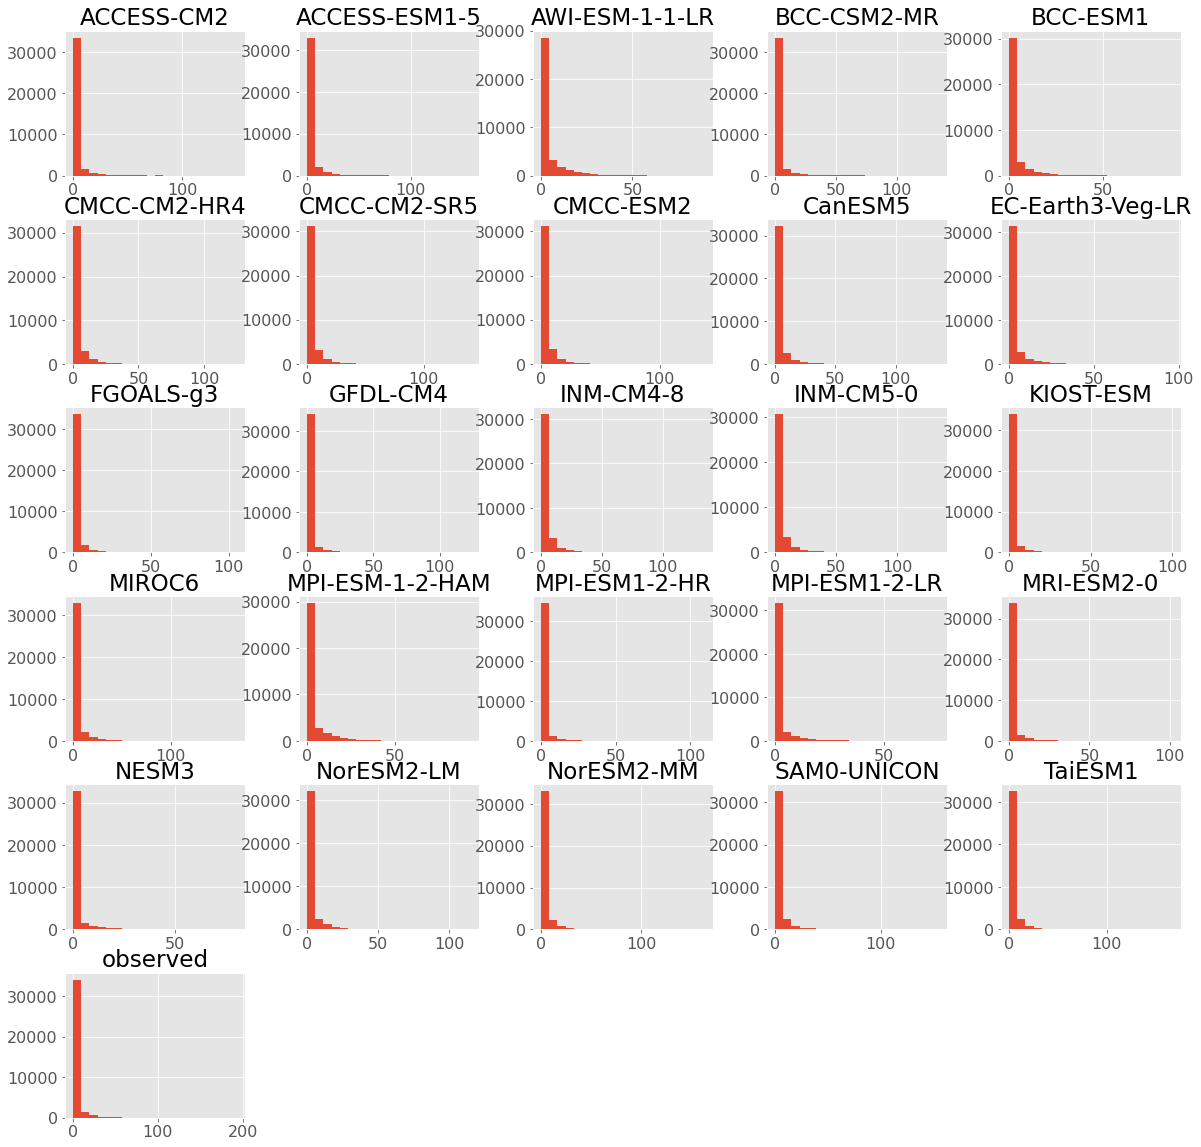

In [11]:
df_train.hist(figsize=(20,20), bins=20)
plt.xlim(0, 50)

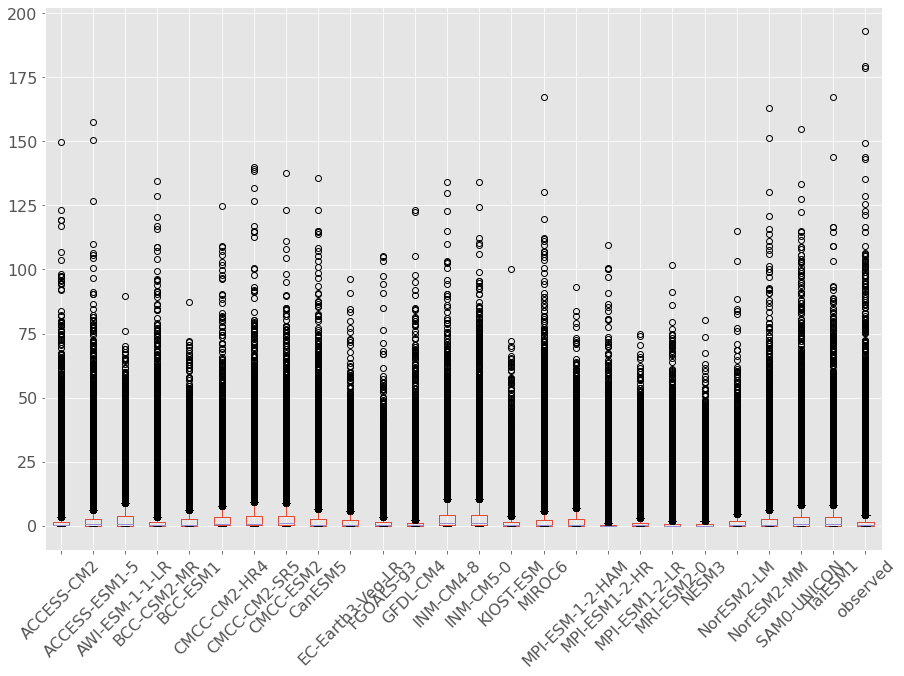

In [12]:
df_train.boxplot(figsize=(15,10), rot=45);

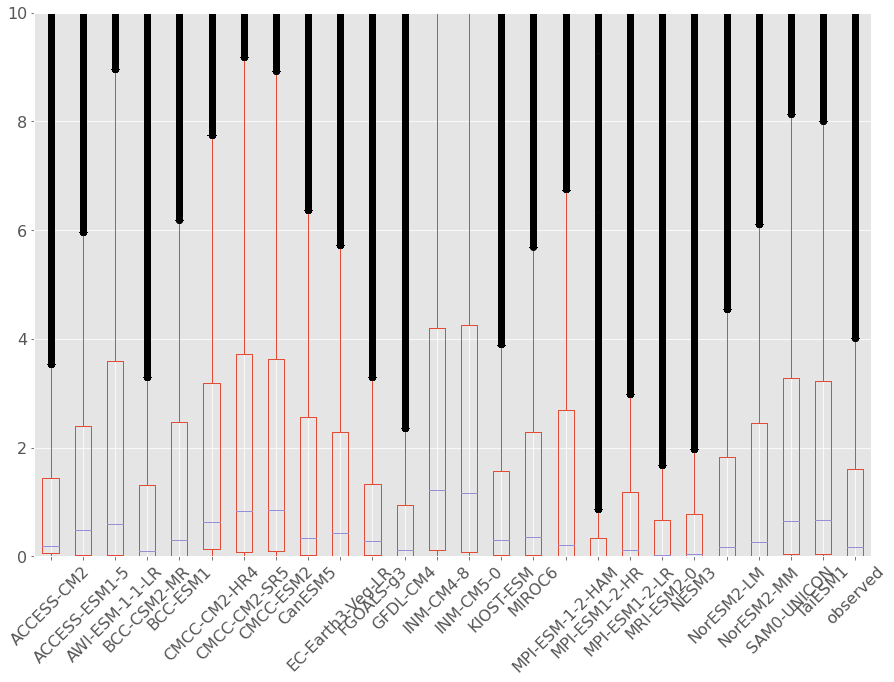

In [13]:
axes = df_train.boxplot(figsize=(15,10), rot=45);
axes.set_ylim(0, 10);

From the boxplots, we can see that while the mean rainfall values are low, when it actually rains the volumes are much higher. After reducing the y-axis limits, we see that there is some variation in the amount and variance of rain across measurement areas.  

#### 5. Train ensemble machine learning model using `RandomForestRegressor` and evaluate with metric of your choice (e.g., `RMSE`) by considering `Observed` as the target column. 

In [14]:
# Prepare train and test data
X_train = df_train.drop(columns=["observed"])
y_train = df_train["observed"]

X_test = df_test.drop(columns=["observed"])
y_test = df_test["observed"]

# Train random forest ensemble model
model = RandomForestRegressor().fit(X_train, y_train)

# Predict on test data
y_predicted = model.predict(X_train)

# Ensemble results
rmse = mean_squared_error(y_train, y_predicted, squared=False)
rmse

3.1160079742699947

In [15]:
# Individual models
models = X_train.columns.to_list()
results = {}

for model in models:
    X = pd.DataFrame(X_train[model])
    rf_model = RandomForestRegressor().fit(X, y_train)
    y_pred = rf_model.predict(X)
    results[model] = mean_squared_error(y_train, y_pred, squared=False)
    print(f"{model}: {results[model]:.3f}")

ACCESS-CM2: 3.679
ACCESS-ESM1-5: 4.205
AWI-ESM-1-1-LR: 4.711
BCC-CSM2-MR: 4.701
BCC-ESM1: 4.786
CMCC-CM2-HR4: 3.829
CMCC-CM2-SR5: 4.145
CMCC-ESM2: 4.012
CanESM5: 3.902
EC-Earth3-Veg-LR: 5.800
FGOALS-g3: 4.238
GFDL-CM4: 4.400
INM-CM4-8: 4.394
INM-CM5-0: 4.723
KIOST-ESM: 3.999
MIROC6: 4.522
MPI-ESM-1-2-HAM: 5.175
MPI-ESM1-2-HR: 6.139
MPI-ESM1-2-LR: 5.408
MRI-ESM2-0: 5.300
NESM3: 5.254
NorESM2-LM: 4.459
NorESM2-MM: 4.345
SAM0-UNICON: 4.324
TaiESM1: 3.890


In [16]:
results_df = pd.DataFrame(data = results.values(),
                          index = results.keys(),
                          columns = ['RMSE'])
results_df['Better than Ensemble?'] = results_df['RMSE'] < rmse
results_df

,RMSE,Better than Ensemble?
ACCESS-CM2,3.678730,False
ACCESS-ESM1-5,4.204544,False
AWI-ESM-1-1-LR,4.710985,False
BCC-CSM2-MR,4.700800,False
BCC-ESM1,4.786490,False
CMCC-CM2-HR4,3.828656,False
CMCC-CM2-SR5,4.145342,False
CMCC-ESM2,4.011922,False
CanESM5,3.902293,False
EC-Earth3-Veg-LR,5.800399,False


#### 6. Discuss your results. 

*Are you getting better results with ensemble models compared to the individual climate models?*

All individual models perform worse than the ensemble of models. 

## 4. Obtain best hyperparameter settings using spark's MLlib.

**See Milestone3-Task4 Notebook.** https://github.com/UBC-MDS/525_group17/blob/main/notebooks/Milestone3-Task4.ipynb

### Part 2: Preparation for deploying model next week

We’ve found ```n_estimators=100, max_depth=5``` to be the best hyperparameter settings with MLlib (from the task 4 from milestone3), here we then use the same hyperparameters to train a scikit-learn model. 

In [17]:
model = RandomForestRegressor(n_estimators=100, max_depth=5)
model.fit(X_train, y_train)

print(f"Train RMSE: {mean_squared_error(y_train, model.predict(X_train), squared=False):.2f}")
print(f" Test RMSE: {mean_squared_error(y_test, model.predict(X_test), squared=False):.2f}")

Train RMSE: 7.89
 Test RMSE: 8.66


***Upload model.joblib to s3. You choose how you want to upload it.***

In [18]:
# ready to deploy
dump(model, "model.joblib")

['model.joblib']